In [1]:
import os
import numpy as np
from numpy import linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from random import randint, randrange
from scipy.spatial import distance
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import pylab

In [2]:
def load_data():
    file_name = 'toydata2.mat'
    path = os.getcwd()
    path = path+'/data/'+file_name
    data = sio.loadmat(path)
    X = data['data']    # get array from dictionary
    y = data['label']    # get array from dictionary
    return X, y

X, y = load_data()


In [3]:
def assignPoints(X, mu):
    y = np.zeros((1,len(X.T)))
    points_number = 0
    for x in X.T:
        y.T[points_number] = np.argmin([la.norm(x-mu.T[0]), la.norm(x-mu.T[1]),
                                        la.norm(x-mu.T[2])])
        points_number = points_number + 1 
    return y[0].astype(int)


def updateCentroids(X, y, k):
    mu = np.zeros((1,3))
    for dim in range(len(X)):
        class_array = [np.array([]) for _ in range(k)]
        for i in range(len(X.T)):
            class_array[y[i]] = np.append(class_array[y[i]], X[dim][i])
        mean = np.array([np.mean(class_array[i]) for i in range(len(class_array))])
        mu = np.vstack((mu, mean))
    return mu[1:]


def computeCost(mu_old, mu_new):
    return np.sum(((mu_old[0] - mu_new[0]) ** 2))


def showData(X, y, mu):
    colors_data = ['green','blue','cyan']
    fig1 = plt.figure(1)
    fig1.suptitle('k-Means clustering')
    ax1 = fig1.add_subplot(1,1,1, projection='3d')
    ax1.scatter(X[0], X[1], X[2], alpha=0.2 ,c=y, 
                cmap=mpl.colors.ListedColormap(colors_data))
    ax1.scatter(mu[0], mu[1], mu[2], c='red', s=100)
    ax1.set_title('Original Training Data')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('x3')


def runKmeans(X, k, tol):
    # Initialize
    rnd_int = [randrange(0,len(X[0])) for _ in range(k)]
    mu_init = np.array([X[0][rnd_int], X[1][rnd_int], X[2][rnd_int]])
    y = assignPoints(X, mu_init)
    mu_old = mu_init
    mu_new = updateCentroids(X,y,k)
    while computeCost(mu_old, mu_new) >= tol:
        y = assignPoints(X, mu_new)
        mu_old = mu_new
        mu_new = updateCentroids(X,y,k)
        print(computeCost(mu_old, mu_new))
    showData(X,y,mu_new)




0.0429816742456
0.0213397286107
0.0016567871762
0.00117938027888
0.000158014219929
0.000258868871605
2.76706405426e-05


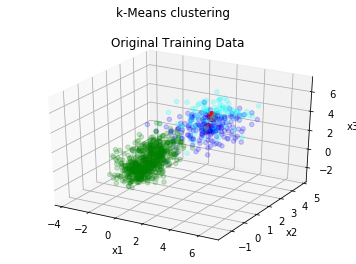

In [4]:
# k-Means parameter
k = 3
tol = 0.00005

runKmeans(X, k, tol)
plt.show()
